In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
DATA_PATH = './data/'

In [5]:
os.listdir(DATA_PATH)

['nyra_start_table.csv',
 'nyra_race_table.csv',
 'nyra_2019_complete.csv',
 'nyra_tracking_table.csv']

#### File descriptions 
File descriptions <br>
nyra_start_table.csv - horse/jockey race data <br>
nyra_race_table.csv - racetrack race data <br>
nyra_tracking_table.csv - tracking data <br>
nyra_2019_complete.csv - combined table of three above files <br>


#### Start table
horse/jockey race data

track_id - 3 character id for the track the race took place at. AQU -Aqueduct, BEL - Belmont, SAR - Saratoga.

race_date - date the race took place. YYYY-MM-DD.

race_number - Number of the race. Passed as 3 characters but can be cast or converted to int for this data set.

program_number - Program number of the horse in the race passed as 3 characters. Should remain 3 characters as it isn't limited to just numbers. Is essentially the unique identifier of the horse in the race.

weight_carried - An integer of the weight carried by the horse in the race.

jockey - Name of the jockey on the horse in the race. 50 character max.

odds - Odds to win the race passed as an integer. Divide by 100 to derive the odds to 1. Example - 1280 would be 12.8-1.

position_at_finish - An integer of the horse's finishing position. (added to the dataset 9/8/22)

In [6]:
start_table = pd.read_csv(DATA_PATH + 'nyra_start_table.csv')

In [11]:
start_table.columns = ['track_id', 'race_date', 'race_id', 'horse_race_id', 'weight', 'jockey', 'odds', 'position_at_finish']

In [12]:
start_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14914 entries, 0 to 14913
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   track_id            14914 non-null  object
 1   race_date           14914 non-null  object
 2   race_id             14914 non-null  int64 
 3   horse_race_id       14914 non-null  object
 4   weight              14914 non-null  int64 
 5   jockey              14914 non-null  object
 6   odds                14914 non-null  int64 
 7   position_at_finish  14914 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 932.2+ KB


In [13]:
start_table.head(5)

,track_id,race_date,race_id,horse_race_id,weight,jockey,odds,position_at_finish
0,AQU,2019-01-01,1,2,120,Junior Alvarado,295,3
1,AQU,2019-01-01,1,3,118,Jose Lezcano,180,4
2,AQU,2019-01-01,1,4,123,Jomar Garcia,1280,5
3,AQU,2019-01-01,1,5,118,Manuel Franco,1150,1
4,AQU,2019-01-01,2,1,121,Jose Lezcano,220,2


In [18]:
start_table.describe().T

,count,mean,std,min,25%,50%,75%,max
race_id,14914.0,5.494502,2.825914,1.0,3.0,6.0,8.0,13.0
weight,14914.0,120.453869,3.522064,110.0,118.0,120.0,122.0,160.0
odds,14914.0,1483.587233,1956.171339,0.0,335.0,730.0,1740.0,19100.0
position_at_finish,14914.0,4.486255,2.569149,1.0,2.0,4.0,6.0,14.0


In [26]:
start_table.nunique()

track_id                3
race_date             217
race_id                13
horse_race_id          20
weight                 35
jockey                178
odds                  656
position_at_finish     14
dtype: int64

So, now we now, that this dataset inculdes:

- 3 tracks
- 13 races 
    - spread across 217 dates
- 20 horses ids 
    - Does this mean 20 horses in total, or each race resets the horse id, meaning substantially more horses?
- 178 jockeys
- various odds 
- and the fact that there are a max of 14 participants in a race 

Text(0.5, 1.0, 'Distribution of weight carried')

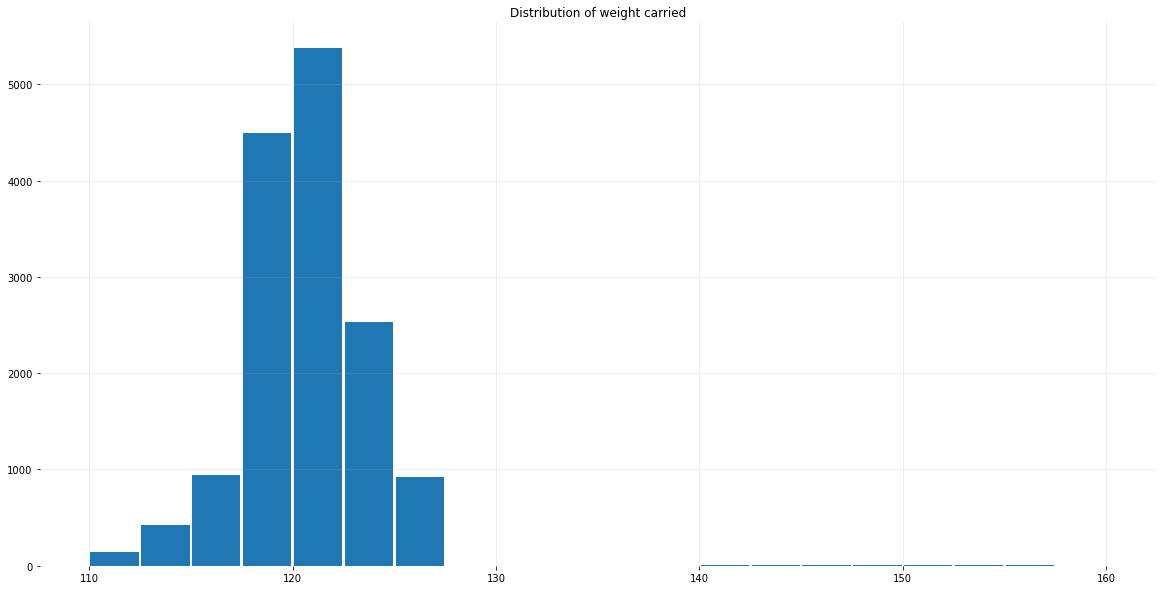

In [33]:
plt.figure(figsize = (20,10))
plt.hist(start_table.weight, rwidth=.95, bins = 20)
plt.grid(alpha = .25)
plt.box(False)
plt.title('Distribution of weight carried')

In [39]:
print(f"First entry: {start_table.race_date.min()}")
print(f"Last entry: {start_table.race_date.max()}")
print(f"Num days: {start_table.race_date.nunique()}")

First entry: 2019-01-01
Last entry: 2019-12-31
Num days: 217


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

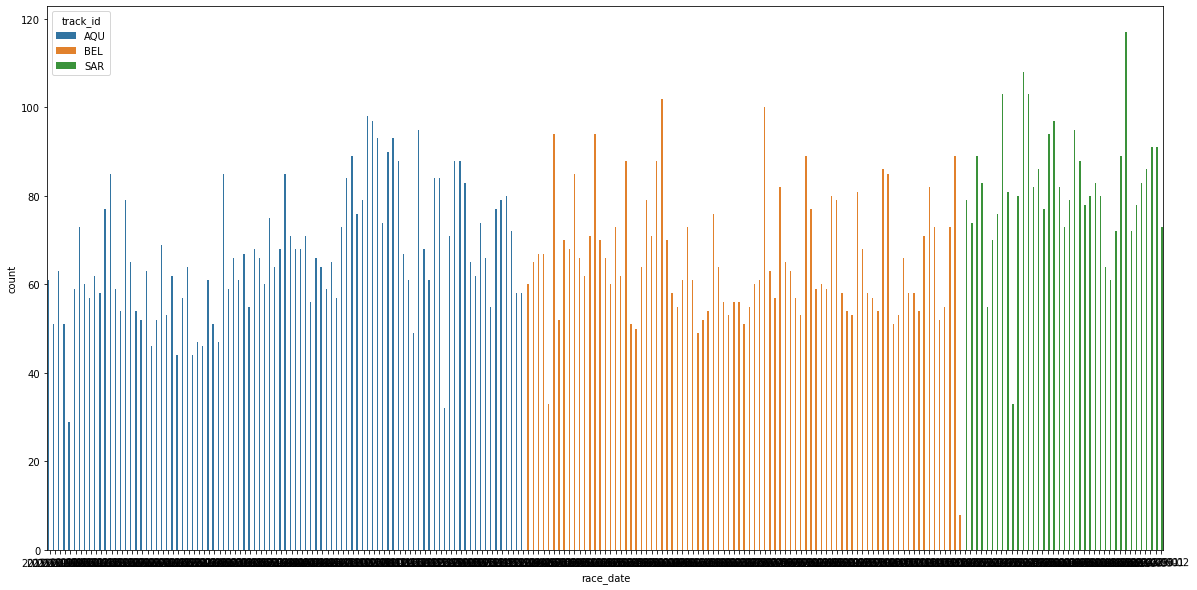

In [45]:
plt.figure(figsize = (20,10))
sns.countplot(data = start_table, x = 'race_date', hue = 'track_id')
plt.xticks(rotation = .90)

In [47]:
start_table.groupby(by = 'track_id').race_date.count()

track_id
AQU    6190
BEL    5539
SAR    3185
Name: race_date, dtype: int64